# 06/12/20 - This notebook breaks down the template matches into PG + ELG, etc. and adds them to the full datasets. Histogram to show.

In [1]:
# libraries
import numpy as np
import pandas as pd
from astropy.io import fits
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

In [2]:
# read in catalogs
links = pd.read_csv('/data/sknabel/autoz_modeling/files/csv/links_autoz052220.csv')
links_identified = pd.read_csv('/data/sknabel/autoz_modeling/files/csv/links_identified_autoz052220.csv')
links_select= pd.read_csv('/data/sknabel/autoz_modeling/files/csv/links_select052920.csv')
links_identified_select = pd.read_csv('/data/sknabel/autoz_modeling/files/csv/links_identified_select052920.csv')
li = pd.read_csv('/data/sknabel/autoz_modeling/files/csv/li_autoz_latest.csv')
li_select = pd.read_csv('/data/sknabel/autoz_modeling/files/csv/li_select_latest.csv')

In [4]:

# initial plot to see li with templates

pg_elg1 = li[(li.z1 < li.z2) & (li.template1 >=40) & (li.template1 <= 42) 
             & (li.template2 > 42) & (li.template2 <= 47)]
pg_elg2 = li[(li.z1 > li.z2) & (li.template2 >=40) & (li.template2 <= 42)
             & (li.template1 > 42) & (li.template1 <= 47)]

pg_elg = pd.concat([pg_elg1, pg_elg2])
pg_elg['type'] = 'PG + ELG'

elg_pg1 = li[(li.z1 < li.z2) & (li.template2 >=40) & (li.template2 <= 42)
             & (li.template1 > 42) & (li.template1 <= 47)]
elg_pg2 = li[(li.z1 > li.z2) & (li.template1 >=40) & (li.template1 <= 42)
             & (li.template2 > 42) & (li.template2 <= 47)]

elg_pg = pd.concat([elg_pg1, elg_pg2])
elg_pg['type'] = 'ELG + PG'

elg_elg = li[(li.template2 >= 40) & (li.template2 <= 42) & (li.template1 >=40 ) & (li.template1 <= 42)]
elg_elg['type'] = 'ELG + ELG'
pg_pg = li[(li.template1 > 42) & (li.template2 <= 47) & (li.template2 > 42) & (li.template2 <= 47)]
pg_pg['type'] = 'PG + PG'

li_types = pd.concat([pg_elg, elg_pg, elg_elg, pg_pg])
li_types.columns

/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Index(['Unnamed: 0', 'name', 'KIDS_ID', 'RA', 'DEC', 'mag', 'mag_err', 'zphot',
       'z_min', 'z_max', 'score', 'rms', 'probability', 's*p/10', 'num_0',
       'GAMA_ID', 'Z', 'STELLAR_MASS', 'f_dm', 'theta_e_Ang_slide', 'D1', 'D2',
       'z1', 'sigma1', 'template1', 'z2', 'sigma2', 'template2', 'sigma3',
       'sigma4', 'R', 'prob', 'error', 'type'],
      dtype='object')

In [5]:
li_types

,Unnamed: 0,name,KIDS_ID,RA,DEC,mag,mag_err,zphot,z_min,z_max,...,template1,z2,sigma2,template2,sigma3,sigma4,R,prob,error,type
4,4,LRG_131.8457_0.8238.fits.png,KiDSDR4 J084722.967+004925.69,131.845697,0.823804,18.4457,0.002449,0.48,0.45,0.50,...,40,0.384626,3.206543,46,2.936026,2.936026,1.092137,1.000000,39.617836,PG + ELG
6,6,LRG_140.57001_-0.327.fits.png,KiDSDR4 J092216.803-001937.22,140.570014,-0.327006,18.7952,0.005581,0.49,0.46,0.51,...,40,0.442148,3.207054,47,2.848477,2.848477,1.125884,1.000000,53.044155,PG + ELG
7,7,LRG_183.14553_0.1318.fits.png,KiDSDR4 J121234.927+000754.48,183.145531,0.131800,16.7311,0.001880,0.25,0.22,0.27,...,40,0.758228,3.426661,43,3.171119,3.171119,1.080584,1.000000,48.464748,PG + ELG
12,12,galaxy_175.30418_0.2697.fits.png,KiDSDR4 J114113.002+001610.81,175.304178,0.269670,18.8349,0.005335,0.60,0.55,0.62,...,42,0.480536,3.128163,45,2.878430,2.878430,1.086760,1.000000,45.067879,PG + ELG
13,13,LRG_178.25068_-1.162.fits.png,KiDSDR4 J115300.162-010943.30,178.250678,-1.162029,18.6057,0.003963,0.48,0.45,0.50,...,40,0.403625,2.732548,47,2.518208,2.518208,1.085116,1.000000,38.743416,PG + ELG
21,21,galaxy_214.20758_1.6395.fits.png,KiDSDR4 J141649.819+013822.23,214.207581,1.639510,19.2090,0.005862,0.58,0.54,0.60,...,40,0.773542,3.502364,47,3.357412,3.357412,1.043174,0.999999,43.047825,PG + ELG
22,22,galaxy_217.6782_0.7445.fits.png,KiDSDR4 J143042.767+004440.22,217.678198,0.744506,18.9703,0.005238,0.41,0.37,0.44,...,40,0.848944,4.249801,43,2.733906,2.733906,1.554480,1.000000,37.654591,PG + ELG
25,25,galaxy_212.5992_1.6108.fits.png,KiDSDR4 J141023.808+013638.82,212.599204,1.610785,18.5188,0.002763,0.22,0.19,0.24,...,40,0.233613,3.828642,47,3.575936,3.575936,1.070668,0.999590,54.532490,PG + ELG
32,32,LRG_214.50005_2.6637.fits.png,KiDSDR4 J141800.011+023949.18,214.500046,2.663662,18.9243,0.005114,0.47,0.44,0.49,...,40,0.383512,4.956253,47,3.853266,3.853266,1.286247,0.995781,58.424477,PG + ELG
1,1,galaxy_136.28057_-0.175.fits.png,KiDSDR4 J090507.336-001029.85,136.280570,-0.174960,19.5882,0.009882,0.71,0.67,0.73,...,40,0.026035,3.447326,47,3.049897,3.049897,1.130309,0.999038,57.149158,ELG + PG


In [6]:

# initial plot to see links with templates

pg_elg1 = links[(links.z1 < links.z2) & (links.template1 >=40) & (links.template1 <= 42) 
             & (links.template2 > 42) & (links.template2 <= 47)]
pg_elg2 = links[(links.z1 > links.z2) & (links.template2 >=40) & (links.template2 <= 42)
             & (links.template1 > 42) & (links.template1 <= 47)]

pg_elg = pd.concat([pg_elg1, pg_elg2])
pg_elg['type'] = 'PG + ELG'

elg_pg1 = links[(links.z1 < links.z2) & (links.template2 >=40) & (links.template2 <= 42)
             & (links.template1 > 42) & (links.template1 <= 47)]
elg_pg2 = links[(links.z1 > links.z2) & (links.template1 >=40) & (links.template1 <= 42)
             & (links.template2 > 42) & (links.template2 <= 47)]

elg_pg = pd.concat([elg_pg1, elg_pg2])
elg_pg['type'] = 'ELG + PG'

elg_elg = links[(links.template2 >= 40) & (links.template2 <= 42) & (links.template1 >=40 ) & (links.template1 <= 42)]
elg_elg['type'] = 'ELG + ELG'
pg_pg = links[(links.template1 > 42) & (links.template2 <= 47) & (links.template2 > 42) & (links.template2 <= 47)]
pg_pg['type'] = 'PG + PG'

links_types = pd.concat([pg_elg, elg_pg, elg_elg, pg_pg])
links_types.columns

/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Index(['Unnamed: 0', 'Unnamed: 0.1', 'GAMA_ID', 'ID', 'RA', 'DEC', 'SCORE',
       'z1', 'sigma1', 'template1', 'z2', 'sigma2', 'template2', 'sigma3',
       'sigma4', 'R', 'prob', 'error', 'type'],
      dtype='object')

In [7]:

# initial plot to see links_identified with templates

pg_elg1 = links_identified[(links_identified.z1 < links_identified.z2) & (links_identified.template1 >=40) & (links_identified.template1 <= 42) 
             & (links_identified.template2 > 42) & (links_identified.template2 <= 47)]
pg_elg2 = links_identified[(links_identified.z1 > links_identified.z2) & (links_identified.template2 >=40) & (links_identified.template2 <= 42)
             & (links_identified.template1 > 42) & (links_identified.template1 <= 47)]

pg_elg = pd.concat([pg_elg1, pg_elg2])
pg_elg['type'] = 'PG + ELG'

elg_pg1 = links_identified[(links_identified.z1 < links_identified.z2) & (links_identified.template2 >=40) & (links_identified.template2 <= 42)
             & (links_identified.template1 > 42) & (links_identified.template1 <= 47)]
elg_pg2 = links_identified[(links_identified.z1 > links_identified.z2) & (links_identified.template1 >=40) & (links_identified.template1 <= 42)
             & (links_identified.template2 > 42) & (links_identified.template2 <= 47)]

elg_pg = pd.concat([elg_pg1, elg_pg2])
elg_pg['type'] = 'ELG + PG'

elg_elg = links_identified[(links_identified.template2 >= 40) & (links_identified.template2 <= 42) & (links_identified.template1 >=40 ) & (links_identified.template1 <= 42)]
elg_elg['type'] = 'ELG + ELG'
pg_pg = links_identified[(links_identified.template1 > 42) & (links_identified.template2 <= 47) & (links_identified.template2 > 42) & (links_identified.template2 <= 47)]
pg_pg['type'] = 'PG + PG'

links_identified_types = pd.concat([pg_elg, elg_pg, elg_elg, pg_pg])
links_identified_types.columns

/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/shawn/miniconda3/envs/astroconda/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Index(['Unnamed: 0', 'Unnamed: 0.1', 'GAMA_ID', 'ID', 'RA', 'DEC', 'SCORE',
       'STELLAR_MASS', 'Z', 'theta_e', 'z1', 'sigma1', 'template1', 'z2',
       'sigma2', 'template2', 'sigma3', 'sigma4', 'R', 'prob', 'error',
       'type'],
      dtype='object')

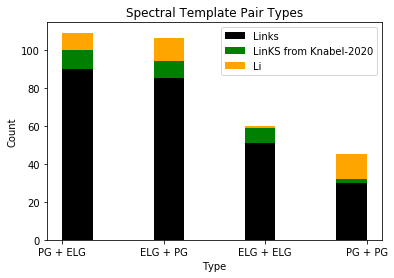

In [26]:
plt.hist([links_types.type, links_identified_types.type, li_types.type],
        color = ['k','g','orange'],
         label = ['Links', 'LinKS from Knabel-2020', 'Li'],
         stacked = True)#, density = True)
plt.legend()
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Spectral Template Pair Types')

#plt.savefig('/home/shawn/Desktop/links_autoz/visuals/png/template_pair_types_all.png')

In [27]:
#links_types.to_csv('/home/shawn/Desktop/links_autoz/files/csv/links_latest.csv')
#links_types.to_csv('/home/shawn/Desktop/links_autoz/files/csv/links_061220.csv')
#links_identified_types.to_csv('/home/shawn/Desktop/links_autoz/files/csv/links_knabel_latest.csv')
#links_identified_types.to_csv('/home/shawn/Desktop/links_autoz/files/csv/links_knabel_061220.csv')
#li_types.to_csv('/home/shawn/Desktop/links_autoz/files/csv/li_latest.csv')
#li_types.to_csv('/home/shawn/Desktop/links_autoz/files/csv/li_061220.csv')

In [8]:

# initial plot to see links_select with templates

pg_elg1 = links_select[(links_select.z1 < links_select.z2) & (links_select.template1 >=40) & (links_select.template1 <= 42) 
             & (links_select.template2 > 42) & (links_select.template2 <= 47)]
pg_elg2 = links_select[(links_select.z1 > links_select.z2) & (links_select.template2 >=40) & (links_select.template2 <= 42)
             & (links_select.template1 > 42) & (links_select.template1 <= 47)]

pg_elg = pd.concat([pg_elg1, pg_elg2])
pg_elg['type'] = 'PG + ELG'
print(len(pg_elg))

elg_pg1 = links_select[(links_select.z1 < links_select.z2) & (links_select.template2 >=40) & (links_select.template2 <= 42)
             & (links_select.template1 > 42) & (links_select.template1 <= 47)]
elg_pg2 = links_select[(links_select.z1 > links_select.z2) & (links_select.template1 >=40) & (links_select.template1 <= 42)
             & (links_select.template2 > 42) & (links_select.template2 <= 47)]


elg_pg = pd.concat([elg_pg1, elg_pg2])
elg_pg['type'] = 'ELG + PG'
print(len(elg_pg))

elg_elg = links_select[(links_select.template2 >= 40) & (links_select.template2 <= 42) & (links_select.template1 >=40 ) & (links_select.template1 <= 42)]
elg_elg['type'] = 'ELG + ELG'
pg_pg = links_select[(links_select.template1 > 42) & (links_select.template2 <= 47) & (links_select.template2 > 42) & (links_select.template2 <= 47)]
pg_pg['type'] = 'PG + PG'
print(len(elg_elg))
print(len(pg_pg))

links_select_types = pd.concat([pg_elg, elg_pg, elg_elg, pg_pg])
print(links_select_types.columns)
print(len(links_select_types))

26
12
10
8
Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'GAMA_ID', 'ID', 'RA',
       'DEC', 'SCORE', 'z1', 'sigma1', 'template1', 'z2', 'sigma2',
       'template2', 'sigma3', 'sigma4', 'R', 'prob', 'error', 'type'],
      dtype='object')
56


/soft/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/soft/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [9]:
len(links_select)

59

In [10]:
len(links_select_types)

56

In [20]:
links_missing = links_select[~links_select.isin(links_select_types)].dropna()
print(links_missing)

    Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1   GAMA_ID      ID         RA  \
7         33.0          33.0            47.0  517603.0  3099.0  132.94489   
8         37.0          37.0            50.0  211045.0  2222.0  140.92513   
32       210.0         210.0           302.0  184530.0  2250.0  176.70961   

        DEC  SCORE        z1     sigma1  template1        z2    sigma2  \
7   2.51329    8.0  0.211158  12.535287       40.0  0.000587  3.148169   
8   0.00929    8.0  0.316710   8.467847       40.0 -0.000292  4.357141   
32 -1.43842    4.0  0.390529   9.843239       40.0  0.000788  4.977860   

    template2    sigma3    sigma4         R      prob      error  
7        12.0  2.589620  2.589620  1.215688  1.000000  38.765163  
8         9.0  2.936936  2.936936  1.483567  0.999967  47.624271  
32       13.0  3.758942  3.758942  1.324272  0.999960  49.293938  


In [29]:
links_select_types_duplicates= links_select_types[links_select_types.duplicated(subset=['GAMA_ID'], keep=False)]
print(links_select_types_duplicates)

    Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1   GAMA_ID      ID         RA  \
28         190           190             278  220682.0  1618.0  182.74348   
29         191           191             278  220682.0  1618.0  182.74348   
33         223           223             316  544226.0  3212.0  214.42336   
34         224           224             316  544226.0  3212.0  214.42336   
37         239           239             329  262874.0    26.0  221.61067   
36         238           238             329  262874.0    26.0  221.61067   
41         260           260             350  884523.0  3446.0  218.72342   
42         261           261             350  884523.0  3446.0  218.72342   

        DEC  SCORE        z1    sigma1  template1        z2    sigma2  \
28  1.59789    4.0  0.288918  9.838969       40.0  0.361366  9.816245   
29  1.59789    4.0  0.288889  9.714018       40.0  0.361285  9.452860   
33 -0.89247   18.0  0.227044  9.393048       40.0  0.649824  7.239896   
34 -0.89247   

In [22]:

# initial plot to see links_identified_select with templates

pg_elg1 = links_identified_select[(links_identified_select.z1 < links_identified_select.z2) & (links_identified_select.template1 >=40) & (links_identified_select.template1 <= 42) 
             & (links_identified_select.template2 > 42) & (links_identified_select.template2 <= 47)]
pg_elg2 = links_identified_select[(links_identified_select.z1 > links_identified_select.z2) & (links_identified_select.template2 >=40) & (links_identified_select.template2 <= 42)
             & (links_identified_select.template1 > 42) & (links_identified_select.template1 <= 47)]

pg_elg = pd.concat([pg_elg1, pg_elg2])
pg_elg['type'] = 'PG + ELG'

elg_pg1 = links_identified_select[(links_identified_select.z1 < links_identified_select.z2) & (links_identified_select.template2 >=40) & (links_identified_select.template2 <= 42)
             & (links_identified_select.template1 > 42) & (links_identified_select.template1 <= 47)]
elg_pg2 = links_identified_select[(links_identified_select.z1 > links_identified_select.z2) & (links_identified_select.template1 >=40) & (links_identified_select.template1 <= 42)
             & (links_identified_select.template2 > 42) & (links_identified_select.template2 <= 47)]

elg_pg = pd.concat([elg_pg1, elg_pg2])
elg_pg['type'] = 'ELG + PG'

elg_elg = links_identified_select[(links_identified_select.template2 >= 40) & (links_identified_select.template2 <= 42) & (links_identified_select.template1 >=40 ) & (links_identified_select.template1 <= 42)]
elg_elg['type'] = 'ELG + ELG'
pg_pg = links_identified_select[(links_identified_select.template1 > 42) & (links_identified_select.template2 <= 47) & (links_identified_select.template2 > 42) & (links_identified_select.template2 <= 47)]
pg_pg['type'] = 'PG + PG'

print(len(links_identified_select))

links_identified_select_types = pd.concat([pg_elg, elg_pg, elg_elg, pg_pg])
links_identified_select_types.columns

7


/soft/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'GAMA_ID', 'ID', 'RA',
       'DEC', 'SCORE', 'STELLAR_MASS', 'Z', 'theta_e', 'z1', 'sigma1',
       'template1', 'z2', 'sigma2', 'template2', 'sigma3', 'sigma4', 'R',
       'prob', 'error', 'type'],
      dtype='object')

In [23]:
print(len(links_identified_select_types))
print(links_identified_select_types)
# one is a duplicate

7
   Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1    GAMA_ID      ID         RA  \
3          34            34              31   585328.0  3234.0  182.36838   
4          48            48              45   544226.0  3212.0  214.42336   
6          50            50              46   250289.0  2730.0  214.36708   
0           2             2               2   323152.0  2967.0  130.54643   
5          49            49              45   544226.0  3212.0  214.42336   
2           6             6               5  3575500.0  1906.0  129.23265   
1           4             4               4  3629152.0  1933.0  135.88864   

       DEC  SCORE  STELLAR_MASS       Z  ...  template1        z2    sigma2  \
3 -0.00889   18.0  1.347000e+11  0.2047  ...       40.0  0.788741  3.371675   
4 -0.89247   18.0  7.340000e+10  0.2270  ...       40.0  0.649824  7.239896   
6  1.99311   28.0  1.894000e+11  0.4009  ...       40.0  0.719616  4.515500   
0  1.64325   30.0  8.277000e+11  0.7216  ...       47.0  0.353286

In [26]:
links_identified_select_dropdup = links_identified_select_types.drop_duplicates()

In [30]:

# initial plot to see li_select with templates

pg_elg1 = li_select[(li_select.z1 < li_select.z2) & (li_select.template1 >=40) & (li_select.template1 <= 42) 
             & (li_select.template2 > 42) & (li_select.template2 <= 47)]
pg_elg2 = li_select[(li_select.z1 > li_select.z2) & (li_select.template2 >=40) & (li_select.template2 <= 42)
             & (li_select.template1 > 42) & (li_select.template1 <= 47)]

pg_elg = pd.concat([pg_elg1, pg_elg2])
pg_elg['type'] = 'PG + ELG'

elg_pg1 = li_select[(li_select.z1 < li_select.z2) & (li_select.template2 >=40) & (li_select.template2 <= 42)
             & (li_select.template1 > 42) & (li_select.template1 <= 47)]
elg_pg2 = li_select[(li_select.z1 > li_select.z2) & (li_select.template1 >=40) & (li_select.template1 <= 42)
             & (li_select.template2 > 42) & (li_select.template2 <= 47)]

elg_pg = pd.concat([elg_pg1, elg_pg2])
elg_pg['type'] = 'ELG + PG'

elg_elg = li_select[(li_select.template2 >= 40) & (li_select.template2 <= 42) & (li_select.template1 >=40 ) & (li_select.template1 <= 42)]
elg_elg['type'] = 'ELG + ELG'
pg_pg = li_select[(li_select.template1 > 42) & (li_select.template2 <= 47) & (li_select.template2 > 42) & (li_select.template2 <= 47)]
pg_pg['type'] = 'PG + PG'

li_select_types = pd.concat([pg_elg, elg_pg, elg_elg, pg_pg])
li_select_types.columns

/soft/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Index(['Unnamed: 0', 'Unnamed: 0.1', 'name', 'KIDS_ID', 'RA', 'DEC', 'mag',
       'mag_err', 'zphot', 'z_min', 'z_max', 'score', 'rms', 'probability',
       's*p/10', 'num_0', 'GAMA_ID', 'Z', 'STELLAR_MASS', 'f_dm',
       'theta_e_Ang_slide', 'D1', 'D2', 'z1', 'sigma1', 'template1', 'z2',
       'sigma2', 'template2', 'sigma3', 'sigma4', 'R', 'prob', 'error',
       'type'],
      dtype='object')

In [61]:
len(li_select_types)

8

In [33]:
li_select.GAMA_ID

0     16104
1    362314
2    125108
3    261815
4     55728
5     39881
6    569641
7    297460
Name: GAMA_ID, dtype: int64

In [68]:
#links_select_types.to_csv('/home/shawn/Desktop/links_autoz/files/csv/links_select_latest.csv')
#links_select_types.to_csv('/home/shawn/Desktop/links_autoz/files/csv/links_select_061220.csv')
#links_identified_select_types.to_csv('/home/shawn/Desktop/links_autoz/files/csv/links_knabel_select_latest.csv')
#links_identified_select_types.to_csv('/home/shawn/Desktop/links_autoz/files/csv/links_knabel_select_061220.csv')
#li_select_types.to_csv('/home/shawn/Desktop/links_autoz/files/csv/li_select_latest.csv')
#li_select_types.to_csv('/home/shawn/Desktop/links_autoz/files/csv/li_select_061220.csv')

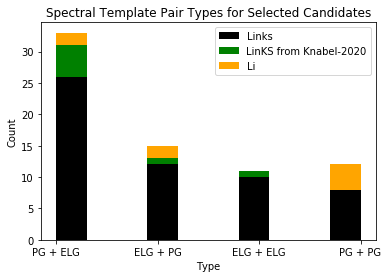

In [71]:
plt.hist([links_select_types.type, links_identified_select_types.type, li_select_types.type],
        color = ['k','g','orange'],
         label = ['Links', 'LinKS from Knabel-2020', 'Li'],
         stacked = True)#, density = True)
plt.legend()
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Spectral Template Pair Types for Selected Candidates')

#plt.savefig('/home/shawn/Desktop/links_autoz/visuals/png/template_pair_types_select.png')